## Working with Xarray
Xarray is a class of objects added to the regular Python system that allows storing data in a more organized method. The format is very similar to netCDF classic model (netCDF3). It can read netCDF files efficiently and handle some issues associated with incorrectly designed netCDF files.

Xarray also has extentions to use the Numpy, Pandas, Dask, and SciPy libaries directly. Think of Xarray as a tool for organizing data in a way that other libaries can be used on the data efficiently.

The primary difference between Xarray and Pandas is that Pandas is designed to handle 1-D data while Xarray can handle n-D data and metadata about the data.

The one downside is that Xarray has very powerful functions with less great documentation. May need to dig a bit to find the best way to perform a task.

In [1]:
import numpy as np
import xarray as xr  # Convention is to import xarray as xr

## DataArray
Here we create some data with Numpy and put into an Xarray DataArray. Notice how there is a concept of dimensionality built into DataArray. "xarray.DataArray  (dim_0: 10000)". But because we didn't define the dimension name, a generic one was created for us. Also notice how nice the printing looks. Xarray plays very well with Jupyter.

In [2]:
data = np.arange(10000)  # This is a numpy array
da = xr.DataArray(data)  # Create the Xarray DataArray using Numpy array.
da  # Convention suggests using the variable da for DataArray when feasable.

<xarray.DataArray (dim_0: 10000)>
array([   0,    1,    2, ..., 9997, 9998, 9999])
Dimensions without coordinates: dim_0

This time create a time array to match the data array shape. Time will be one minute time steps. The time array will become a coordinate variable to describe the values along the dimension we defined and named "time". The coordinate is set to the time array and the dimension is set to "time" string.

In [3]:
time = np.array('2019-11-01T00:00:00', dtype='datetime64[m]') + np.arange(data.size)
time = time.astype('datetime64[ns]')  # Only done to stop a warning appearing
da = xr.DataArray(data, dims=['time'], coords=[time])
da

<xarray.DataArray (time: 10000)>
array([   0,    1,    2, ..., 9997, 9998, 9999])
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2019-11-07T22:39:00

We can add attributes describing metadata about the data.

In [4]:
da.attrs['long_name'] = 'Amazing data that will win me a Nobel prize.'
da.attrs['units'] = 'degK'
da.attrs['valid_min'] = 0.
da.attrs['valid_max'] = 10000.
da

<xarray.DataArray (time: 10000)>
array([   0,    1,    2, ..., 9997, 9998, 9999])
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2019-11-07T22:39:00
Attributes:
    long_name:  Amazing data that will win me a Nobel prize.
    units:      degK
    valid_min:  0.0
    valid_max:  10000.0

Same as above but all in one step while creating the DataArray.

In [5]:
da = xr.DataArray(
    data, dims=['time'],
    coords=[time],
    attrs={'long_name': 'Amazing data that will win me a Nobel prize.',
           'units': 'degK',
           'valid_min': 0.,
           'valid_max': 10000.})
da

<xarray.DataArray (time: 10000)>
array([   0,    1,    2, ..., 9997, 9998, 9999])
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2019-11-07T22:39:00
Attributes:
    long_name:  Amazing data that will win me a Nobel prize.
    units:      degK
    valid_min:  0.0
    valid_max:  10000.0

To extract the data values only we use the .values attribute on the DataArray

In [6]:
da.values

array([   0,    1,    2, ..., 9997, 9998, 9999])

To extract the attributes as a dictionary we use the .attrs attribute.

In [7]:
da.attrs

{'long_name': 'Amazing data that will win me a Nobel prize.',
 'units': 'degK',
 'valid_min': 0.0,
 'valid_max': 10000.0}

Or the attrs decorator can also accept a name for a specific attribute

In [8]:
da.attrs['long_name']

'Amazing data that will win me a Nobel prize.'

In [9]:
type(da)

xarray.core.dataarray.DataArray

In [10]:
type(da.values)

numpy.ndarray

In [11]:
type(da.attrs)

dict

## Dataset
The full power of Xarray comes from using Datasets. A Dataset is a collection of DataArrays. The beauty of Datasets is holding all the corresponding data together and performing functions on multiple DataArrays in the Datasets all at once. This becomes very powerful and extremely fast!

Create some data and a time data array to match the data we created with minute time steps.

In [12]:
data1 = np.arange(10000, dtype=float)
data2 = np.arange(10000, dtype=float) + 123.456
time = np.array('2019-11-01T00:00:00', dtype='datetime64[m]') + np.arange(data1.size)

In [13]:
ds = xr.Dataset(
    # This is the data section.
    # Notice all data is wrapped in a dictionary. In that dictionary the key
    # is the variable name followed by a tuple. The first value of the tuple
    # is the dimension(s) name, followed by the data values, followed by an optional
    # dictionary of attributes as key:value pairs.
    data_vars={'data1': ('time', data1, {'long_name': 'Data 1 values', 'units': 'degC'}),
               'data2': ('time', data2, {'long_name': 'Data 2 values', 'units': 'degF'})
               },
    # This is the coordinate section following the same format. Since this
    # comes next it could be interpreted as positional coordinates.
    # But we are using keywords to make it easier to understand.
    coords={'time': ('time', time, {'long_name': 'Time in UTC'})},
    # Lastly we have the global attributes.
    attrs={'the_best_animals': 'sharks'}
)

/var/folders/08/hzthl3yd3mqd30ltf7nr9yfr0000gq/T/ipykernel_99995/1457505030.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds = xr.Dataset(


Print out the full Dataset. Xarray convention suggests to use the variable name ds for Xarray Dataset when possible.

In [14]:
ds

<xarray.Dataset>
Dimensions:  (time: 10000)
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2019-11-07T22:39:00
Data variables:
    data1    (time) float64 0.0 1.0 2.0 3.0 ... 9.997e+03 9.998e+03 9.999e+03
    data2    (time) float64 123.5 124.5 125.5 ... 1.012e+04 1.012e+04 1.012e+04
Attributes:
    the_best_animals:  sharks

Print out one DataArray from the Dataset

In [15]:
ds['data1']

<xarray.DataArray 'data1' (time: 10000)>
array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.997e+03, 9.998e+03,
       9.999e+03])
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2019-11-07T22:39:00
Attributes:
    long_name:  Data 1 values
    units:      degC

Print out values from the one variable in the Dataset

In [16]:
ds['data1'].values

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.997e+03, 9.998e+03,
       9.999e+03])

Print out one attribute from one DataArray

In [17]:
ds['data1'].attrs['units']

'degC'

## Read in data
Let's read in a single netCDF data file. Notice we are using relative paths to go one directory down into the _data_ directory.

In [18]:
from pathlib import Path
filename = Path('..', 'data', 'sgpmetE13.b1', 'sgpmetE13.b1.20191101.000000.cdf')
ds = xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:                       (time: 1440)
Coordinates:
  * time                          (time) datetime64[ns] 2019-11-01 ... 2019-1...
Data variables: (12/50)
    base_time                     datetime64[ns] ...
    time_offset                   (time) datetime64[ns] ...
    atmos_pressure                (time) float32 ...
    qc_atmos_pressure             (time) int32 ...
    temp_mean                     (time) float32 ...
    qc_temp_mean                  (time) int32 ...
    ...                            ...
    qc_logger_volt                (time) int32 ...
    logger_temp                   (time) float32 ...
    qc_logger_temp                (time) int32 ...
    lat                           float32 ...
    lon                           float32 ...
    alt                           float32 ...
Attributes: (12/29)
    command_line:                met_ingest -s sgp -f E13
    process_version:             ingest-met-4.40-0.el7
    dod_version:                 met-b1-7.3
    input_source:                /data/collection/sgp/sgpmetE13.00/MET_Table1...
    site_id:                     sgp
    platform_id:                 met
    ...                          ...
    qc_bit_2_assessment:         Bad
    qc_bit_3_description:        Value is greater than the valid_max.
    qc_bit_3_assessment:         Bad
    qc_bit_4_description:        Difference between current and previous valu...
    qc_bit_4_assessment:         Indeterminate
    history:                     created by user dsmgr on machine garnet at 2...

We can also read in multiple netCDF data files using a different method. All the keywords accepted by open_dataset() are accepted by open_mfdataset().

The filename glob is understood by open_mfdataset() and correctly grabs all the files that match the file glob. Using parallel=True allows it to use multiple cores for reading the data. This may depend on your machine and number of cores available, and may be faster or may not. We can also reduce the amount of memory required by excluding some variables from being read.

In [19]:
filename = str(Path('..', 'data', 'sgpmetE13.b1', 'sgpmetE13.b1.*.cdf'))

To resolve issues with incorrectly formatted variables or reduce the memory, we can exclude some variables from being read.

In [20]:
drop_vars = [
    'base_time', 'time_offset', 'vapor_pressure_std', 'wspd_arith_mean',
    'qc_wspd_arith_mean', 'wspd_vec_mean', 'qc_wspd_vec_mean',
    'wdir_vec_mean', 'qc_wdir_vec_mean', 'wdir_vec_std', 'tbrg_precip_total',
    'qc_tbrg_precip_total', 'tbrg_precip_total_corr', 'qc_tbrg_precip_total_corr',
    'org_precip_rate_mean', 'qc_org_precip_rate_mean', 'pwd_err_code',
    'pwd_mean_vis_1min', 'qc_pwd_mean_vis_1min', 'pwd_mean_vis_10min',
    'qc_pwd_mean_vis_10min', 'pwd_pw_code_inst', 'qc_pwd_pw_code_inst',
    'pwd_pw_code_15min', 'qc_pwd_pw_code_15min', 'pwd_pw_code_1hr',
    'qc_pwd_pw_code_1hr', 'pwd_precip_rate_mean_1min',
    'qc_pwd_precip_rate_mean_1min', 'pwd_cumul_rain', 'qc_pwd_cumul_rain',
    'pwd_cumul_snow', 'qc_pwd_cumul_snow', 'logger_volt', 'qc_logger_volt',
    'logger_temp', 'qc_logger_temp', 'temp_std', 'rh_std', 'vapor_pressure_mean',
    'qc_vapor_pressure_mean', 'a_very_long_name_that_is_not_in_the_data_file']


ds = xr.open_mfdataset(filename, drop_variables=drop_vars, parallel=True)

ds

<xarray.Dataset>
Dimensions:            (time: 5460)
Coordinates:
  * time               (time) datetime64[ns] 2019-11-01 ... 2019-11-04T18:59:00
Data variables:
    atmos_pressure     (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_atmos_pressure  (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    temp_mean          (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_temp_mean       (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    rh_mean            (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_rh_mean         (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                (time) float32 36.6 36.6 36.6 36.6 ... 36.6 36.6 36.6
    lon                (time) float32 -97.49 -97.49 -97.49 ... -97.49 -97.49
    alt                (time) float32 318.0 318.0 318.0 ... 318.0 318.0 318.0
Attributes: (12/29)
    command_line:                met_ingest -s sgp -f E13
    process_version:             ingest-met-4.40-0.el7
    dod_version:                 met-b1-7.3
    input_source:                /data/collection/sgp/sgpmetE13.00/MET_Table1...
    site_id:                     sgp
    platform_id:                 met
    ...                          ...
    qc_bit_2_assessment:         Bad
    qc_bit_3_description:        Value is greater than the valid_max.
    qc_bit_3_assessment:         Bad
    qc_bit_4_description:        Difference between current and previous valu...
    qc_bit_4_assessment:         Indeterminate
    history:                     created by user dsmgr on machine garnet at 2...

Once we have the data read, Xarray has a wrapper around matplotlib to generate plots directly from the Dataset.

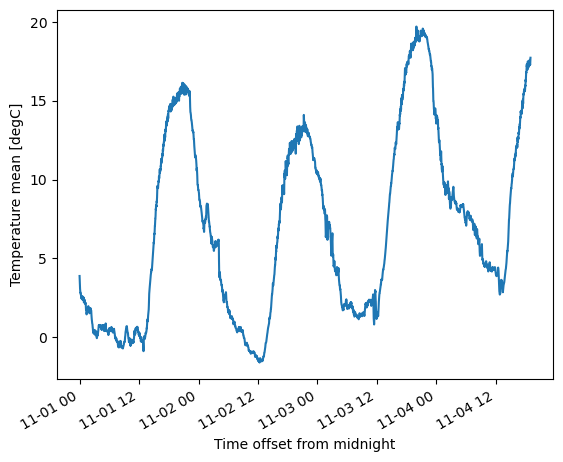

In [21]:
# This is a Jupyter specific command using system magic to let the plot display here.
%matplotlib inline  

ds['temp_mean'].plot()

Here we make two plots. Syntax is slightly different than calling matplotlib directly.

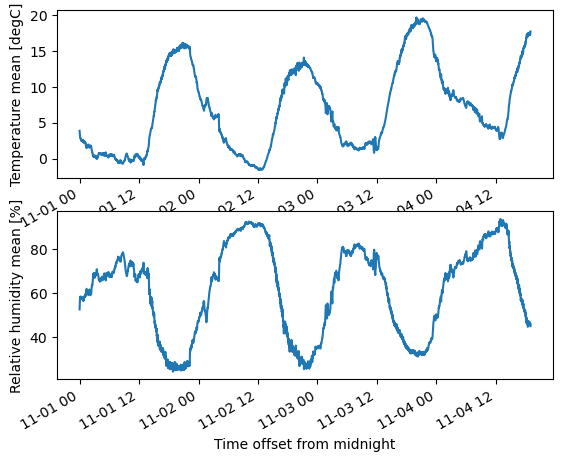

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2)
ds['temp_mean'].plot(ax=axes[0])
ds['rh_mean'].plot(ax=axes[1])

## Xarray playing very well with other libraries
We can use Xarray with Pandas natively for even easier actions.
Here we use pandas to make a time array with a 6 hour time step for four years.

In [23]:
import pandas as pd

pd_time = pd.date_range('2000-01-01', freq='6H', periods=365 * 4)
pd_time

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 06:00:00',
               '2000-01-01 12:00:00', '2000-01-01 18:00:00',
               '2000-01-02 00:00:00', '2000-01-02 06:00:00',
               '2000-01-02 12:00:00', '2000-01-02 18:00:00',
               '2000-01-03 00:00:00', '2000-01-03 06:00:00',
               ...
               '2000-12-28 12:00:00', '2000-12-28 18:00:00',
               '2000-12-29 00:00:00', '2000-12-29 06:00:00',
               '2000-12-29 12:00:00', '2000-12-29 18:00:00',
               '2000-12-30 00:00:00', '2000-12-30 06:00:00',
               '2000-12-30 12:00:00', '2000-12-30 18:00:00'],
              dtype='datetime64[ns]', length=1460, freq='6H')

We will create a new Xarray Dataset with a range of numbers matching the number of time samples we created. The Pandas time is used to initialize the xarray Dataset. Because Pandas and Xarray play well together, it just works.

In [24]:
ds = xr.Dataset({'data': ('time', np.arange(len(pd_time))), 'time': pd_time})
ds

<xarray.Dataset>
Dimensions:  (time: 1460)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-12-30T18:00:00
Data variables:
    data     (time) int64 0 1 2 3 4 5 6 7 ... 1453 1454 1455 1456 1457 1458 1459

## Sub-selecting data
Now let's calculate the mean for a day by grouping the data. This works for all time worded groups: hour, minute, year, month, ... The method returns a new Dataset and leaves the original untouched. Notice how _data_ was originally type integer, but because we are calcualting a mean, the type is upconverted to a float.

In [25]:
ds_mean = ds.groupby('time.day').mean()
ds_mean

<xarray.Dataset>
Dimensions:  (day: 31)
Coordinates:
  * day      (day) int64 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30 31
Data variables:
    data     (day) float64 670.8 674.8 678.8 682.8 ... 778.8 782.8 836.4 688.2

We can also define the grouping size by using the .resample() method and passing in the function to use using the .reduce() method. If there is no data to perform the operation, a new time step is added with a NaN data value.

In [26]:
ds_mean = ds.resample(time='30min').reduce(np.nanmean)
ds_mean

<xarray.Dataset>
Dimensions:  (time: 17509)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-12-30T18:00:00
Data variables:
    data     (time) float64 0.0 nan nan nan nan ... nan nan nan nan 1.459e+03

The .sel() method selects data based on data or coordinate values. We can extract a range of data by filtering on the time coordinate and using the builtin slice() function. This looks similar to the Pandas example because Xarray is using Pandas.

In [27]:
ds_subset = ds.sel(time=slice('2000-06-01 06:00', '2000-08-03 23:59:59'))
ds_subset

<xarray.Dataset>
Dimensions:  (time: 255)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01T06:00:00 ... 2000-08-03T18:00:00
Data variables:
    data     (time) int64 609 610 611 612 613 614 ... 858 859 860 861 862 863

For selecting at a specific index use .isel().

In [28]:
ds_subset = ds.isel({'time': range(200, 832)})
ds_subset

<xarray.Dataset>
Dimensions:  (time: 632)
Coordinates:
  * time     (time) datetime64[ns] 2000-02-20 ... 2000-07-26T18:00:00
Data variables:
    data     (time) int64 200 201 202 203 204 205 ... 826 827 828 829 830 831

What if we want to find the closest value in time but not match to values outside a tolerable range? We can use the .reindex() method with a tolerance to indicate which values should be matched. The values that don't have a match are set to NaN. We need to use timedelta64() to set the tolerance value which includes a time unit. Anywhere the time is outside the tolerance, the data values are set to NaN. To allow for setting NaN, the data type is upconverted to a float.

In [29]:
# To show how the tolerance works, add some random seconds to the time used in matching
subset_time = ds['time'].values 
random_seconds = np.random.randint(-10, 10, size=subset_time.size).astype('timedelta64[s]')
subset_time = subset_time + random_seconds

ds_result = ds.reindex(time=subset_time, method='nearest',
                          tolerance=np.timedelta64(5, 's'))
print(ds['data'].values[:10])
print(ds_result['data'].values[:10])

[0 1 2 3 4 5 6 7 8 9]
[ 0.  1.  2. nan nan  5. nan  7. nan nan]


To not have a Dataset full of missing values where the time was outside the tolerance, we can drop where all values are set to NaN and return a new Dataset.

In [30]:
print('Number of time values:', ds_result.dims['time'])
ds_result = ds_result.dropna('time', how='all')
print('Number of time values:', ds_result.dims['time'])

Number of time values: 1460
Number of time values: 810
